In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

/Users/asilar/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/asilar/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/asilar/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/asilar/opt/anaconda3/lib/python3.7/site-packages/tensorflow/

In [2]:
print(tf.__version__)

1.13.1


In [10]:
df =pd.read_csv('../data/training.csv')
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [11]:
df.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [12]:
df.shape

(250000, 33)

In [13]:
df = df.replace(-999, np.nan)
df = df.dropna()
df.shape


(68114, 33)

Text(0, 0.5, 'Events')

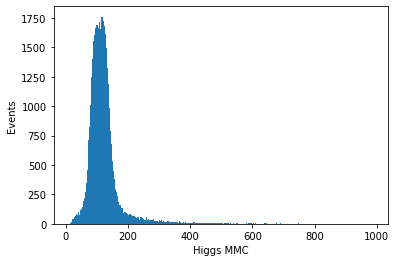

In [14]:
n, bins, patches = plt.hist(x=df['DER_mass_MMC'], bins='auto')
plt.xlabel("Higgs MMC")
plt.ylabel("Events")
#plt.ylim(ymax=8000)
#plt.xlim(xmin =0,xmax=800)



Text(0, 0.5, 'Events')

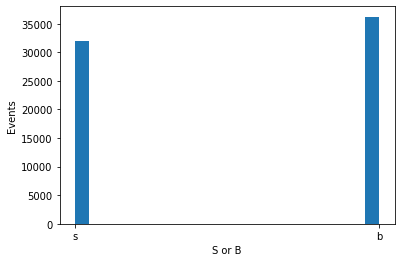

In [15]:
n, bins, patches = plt.hist(x=df['Label'], bins='auto')
plt.xlabel("S or B")
plt.ylabel("Events")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a36b1e710>,
      dtype=object)

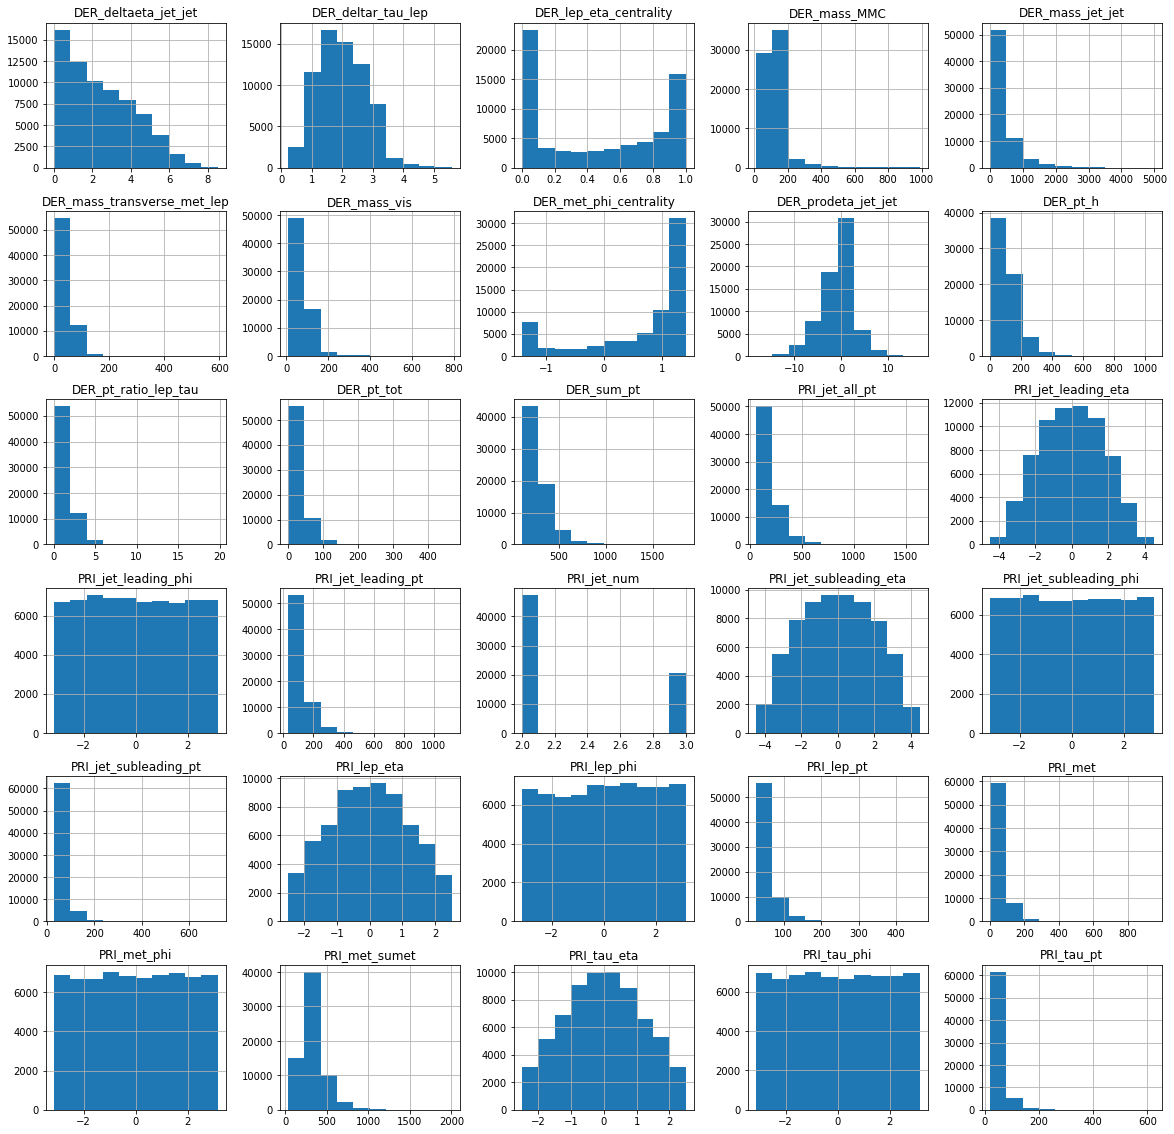

In [16]:
df_droped = df.drop(['EventId', 'Weight'], axis=1)
df_droped.hist(figsize=(20, 20))

In [17]:
df_droped['Label'] = df_droped['Label'].apply({'s':1, 'b':0}.get)
X_train, X_test, y_train, y_test = train_test_split(df_droped.drop(['Label'], axis=1), df_droped['Label'], test_size=0.2, random_state=0)
X_test.head()
#X_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
195062,102.356,36.686,69.990,86.525,0.025,108.756,0.087,2.689,23.164,207.301,...,-0.715,269.298,2,82.133,0.283,1.592,42.219,0.307,-2.445,124.352
19447,106.684,15.062,66.468,57.731,5.063,594.116,-6.397,2.940,6.334,151.194,...,1.120,195.275,2,51.427,2.643,-1.145,43.186,-2.420,-3.128,94.612
123796,178.123,11.300,108.501,10.687,4.589,785.494,-4.031,3.259,2.302,253.788,...,-1.508,272.160,2,80.002,3.405,-0.009,76.572,-1.184,2.976,156.574
176187,57.145,28.642,30.769,120.084,3.625,419.743,-2.691,1.084,26.618,200.373,...,1.151,238.831,2,72.996,2.584,-2.900,65.036,-1.041,-1.622,138.032
104263,113.133,7.875,58.398,172.267,0.141,314.673,-0.004,1.510,24.538,443.391,...,0.218,503.328,2,241.025,-0.099,2.836,123.404,0.042,-1.196,364.428


In [18]:
y_train.head()

93095     1
154536    0
210131    1
224451    1
176158    1
Name: Label, dtype: int64

In [19]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [20]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [21]:
print(X_train.shape)

(54491, 30)


In [22]:
#data is ready build DNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers, regularizers
from tensorflow.keras.layers import Flatten , Activation
from tensorflow.keras.layers import Dense

In [58]:
#import keras.backend as K

# Initialize the constructor
model = Sequential()

model.add(Flatten())

# Add an input layer 
model.add(Dense(1000))
model.add(Activation("relu"))          

model.add(Dense(100))
model.add(Activation("relu"))          


# Add 2nd hidden layer
model.add(Dense(8))
model.add(Activation("relu"))          
          

# Add an output layer 
model.add(Dense(2, activation='sigmoid'))

# define Parameters for the training of the model
# Good default optimizer to start with , how will we calculate our "error." Neural network aims to minimize loss.


model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#     adam~gradient descent  \ loss = degree of error \  metrics =  what to track


# train the model !
model.fit(X_train, y_train,epochs=20, batch_size=32, verbose=1)


#after training we introduce the model to the test dataset
    
val_loss, val_acc = model.evaluate(X_test, y_test) # evaluate the out of sample data with model
print(val_loss) #model's loss
print(val_acc)  #model's accuracy





Epoch 1/20
54491/54491 [==============================] - 3s 62us/sample - loss: 0.3925 - acc: 0.8227
Epoch 2/20
54491/54491 [==============================] - 3s 55us/sample - loss: 0.3609 - acc: 0.8420
Epoch 3/20
54491/54491 [==============================] - 3s 55us/sample - loss: 0.3540 - acc: 0.8434
Epoch 4/20
54491/54491 [==============================] - 3s 56us/sample - loss: 0.3481 - acc: 0.8466
Epoch 5/20
54491/54491 [==============================] - 3s 56us/sample - loss: 0.3422 - acc: 0.8495
Epoch 6/20
54491/54491 [==============================] - 3s 57us/sample - loss: 0.3380 - acc: 0.8515
Epoch 7/20
54491/54491 [==============================] - 6s 103us/sample - loss: 0.3341 - acc: 0.8530
Epoch 8/20
54491/54491 [==============================] - 6s 109us/sample - loss: 0.3300 - acc: 0.8553
Epoch 9/20
54491/54491 [==============================] - 6s 110us/sample - loss: 0.3254 - acc: 0.8574
Epoch 10/20
54491/54491 [==============================] - 6s 113us/sample - lo

In [65]:
print(y_test)
print(y_test.shape)
y_pred=model.predict(X_test)
print(y_pred)
print(y_pred.shape)
y_pred= np.delete(y_pred, np.s_[-1:], axis=1)
print(y_pred.shape)
print(y_pred)
y_pred=(y_pred>0.5)
print(y_pred)
#understand 2 columns because probabilties are not separated 


[0 1 1 ... 1 1 0]
(13623,)
[[0.01524219 0.01422855]
 [0.9089066  0.8965765 ]
 [0.99853903 0.9988378 ]
 ...
 [0.7272119  0.72082984]
 [0.11396146 0.11278615]
 [0.561583   0.53519815]]
(13623, 2)
(13623, 1)
[[0.01524219]
 [0.9089066 ]
 [0.99853903]
 ...
 [0.7272119 ]
 [0.11396146]
 [0.561583  ]]
[[False]
 [ True]
 [ True]
 ...
 [ True]
 [False]
 [ True]]


In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) #confusion matrix is not working with continious probability values
print(cm)
print(cm[1,0])

[[6025 1219]
 [1123 5256]]
1123


In [74]:
sensitivity=cm[0,0]/(cm[0,0]+cm[1,0]) # true positive / actual positive
#the model identifies ~16% of Z boson as Higgs
specificity=cm[1,1]/(cm[1,0]+cm[1,1]) # true negative / actual negative
#the model identifies ~18% of actual Higgs as Z
print(sensitivity)
print(specificity)

0.8428931169557918
0.8239535977425929
